## imports

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

import sys
import paths
from pathlib2 import Path
from paths import *

In [2]:
sys.path.append(PATH_TO_REPO.as_posix())

import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["font.size"] = 14

In [3]:
import load_surfaces, training, dplot, utils, paths, lbfgs_wrapper
from importlib import reload

def RELOAD():
    reload(load_surfaces)
    reload(training)
    reload(dplot)
    reload(utils)
    reload(paths)
    
RELOAD()

## loading model

In [4]:
TYPE = "new"

In [5]:
model = torch.load(str(paths.PATH_TO_MODELS/f"model_{TYPE}.pt"))

### TODO remove (dump all params_scalers is what we really need) and save bounds in normal parametrization, too!

In [6]:
raw_data_new = load_surfaces.load_new_vlt_surfaces()

Loading 53354 surfaces...


In [7]:
raw_data_old = load_surfaces.load_old_vlt_surfaces("TrainrBergomiTermStructure.txt.gz")

In [8]:

raw_data = raw_data_new if TYPE == "new" else raw_data_old


In [9]:
normalized_data = utils.get_train_test_split_nk_nf(raw_data)

In [10]:
params_optimizer = training.ParamsOptimizer(model, normalized_data["params_scaler"], normalized_data["vol_scaler"])

In [11]:
bounds = list(zip(normalized_data["params_train_nk"].min(axis=0),
                  normalized_data["params_train_nk"].max(axis=0)))

In [12]:
len(bounds)

11

## Load some target_vlt_surf

In [106]:
load_surfaces.get_vlt_surf_ms_from_real_data??

In [107]:
ls $PATH_TO_NEW_DATA

20130814.csv      comparing_v3.csv        heston_params.csv
comparing.csv     forward_var_curves.csv  maturity_strike_grid.csv
comparing_v2.csv  forward_var_params.csv  volsurfaces/


In [13]:
from glob import glob

paths_to_real_surf = glob((PATH_TO_REPO/"data/real_vol_surfaces/*").as_posix())

In [14]:
paths_to_real_surf

['/home/alexander/nn_stochvol/data/real_vol_surfaces/spxVols20171215.csv',
 '/home/alexander/nn_stochvol/data/real_vol_surfaces/spxVols20170519.csv',
 '/home/alexander/nn_stochvol/data/real_vol_surfaces/spxVols20171212.csv',
 '/home/alexander/nn_stochvol/data/real_vol_surfaces/spxVols20171214.csv',
 '/home/alexander/nn_stochvol/data/real_vol_surfaces/spxVols20171211.csv',
 '/home/alexander/nn_stochvol/data/real_vol_surfaces/spxVols20171213.csv',
 '/home/alexander/nn_stochvol/data/real_vol_surfaces/spxVols20100204.csv',
 '/home/alexander/nn_stochvol/data/real_vol_surfaces/spxVols20130814.csv']

In [15]:
PATH_TO_REPO/"data/real_vol_surfaces/"

PosixPath('/home/alexander/nn_stochvol/data/real_vol_surfaces')

In [16]:
DATES_YYYYMMDD = sorted([int(x[-12:-4]) for x in paths_to_real_surf])
DATES_YYYYMMDD

[20100204,
 20130814,
 20170519,
 20171211,
 20171212,
 20171213,
 20171214,
 20171215]

In [17]:
# 20100204                 # -0.9 1.9  0.07 
FIRST_YYYYMMDD   = 20130814 # -0.9 2.3 0.05 
DATE_YYYYMMDD = 20130814
vlt_surf_ms, df_vlt_surf, maturities_ms, strikes_ms = load_surfaces.get_vlt_surf_ms_from_real_data(DATE_YYYYMMDD)

Iter 1 Loss 0.99788
Iter 2 Loss 0.53189
Iter 3 Loss 0.13074
Iter 4 Loss 0.10467
Iter 5 Loss 0.10274
Iter 6 Loss 0.09905
Iter 7 Loss 0.09090
Iter 8 Loss 0.08529
Iter 9 Loss 0.08303
Iter 10 Loss 0.08251
Iter 11 Loss 0.08198
Iter 12 Loss 0.08100
Iter 13 Loss 0.07953
Iter 14 Loss 0.07712
Iter 15 Loss 0.07708
Iter 16 Loss 0.07702
Iter 17 Loss 0.07702
Iter 18 Loss 0.07702
Iter 19 Loss 0.07702
Iter 20 Loss 0.07702
Iter 21 Loss 0.07702
Iter 22 Loss 0.07699
Iter 23 Loss 0.07667
Iter 24 Loss 0.07662
Iter 25 Loss 0.07651
Iter 26 Loss 0.07641
Iter 27 Loss 0.07622
Iter 28 Loss 0.07608
Iter 29 Loss 0.07595
Iter 30 Loss 0.07592
Iter 31 Loss 0.07592
Iter 32 Loss 0.07592
Iter 33 Loss 0.07592
Iter 34 Loss 0.07592
Iter 35 Loss 0.07592
Iter 36 Loss 0.07592
Iter 37 Loss 0.07592
Iter 38 Loss 0.07592
Iter 39 Loss 0.07592
Iter 40 Loss 0.07592
Iter 41 Loss 0.07592
Iter 42 Loss 0.07592
Iter 43 Loss 0.07592
Iter 44 Loss 0.07592
Iter 45 Loss 0.07592
Iter 46 Loss 0.07591
Iter 47 Loss 0.07591
Iter 48 Loss 0.07591
I

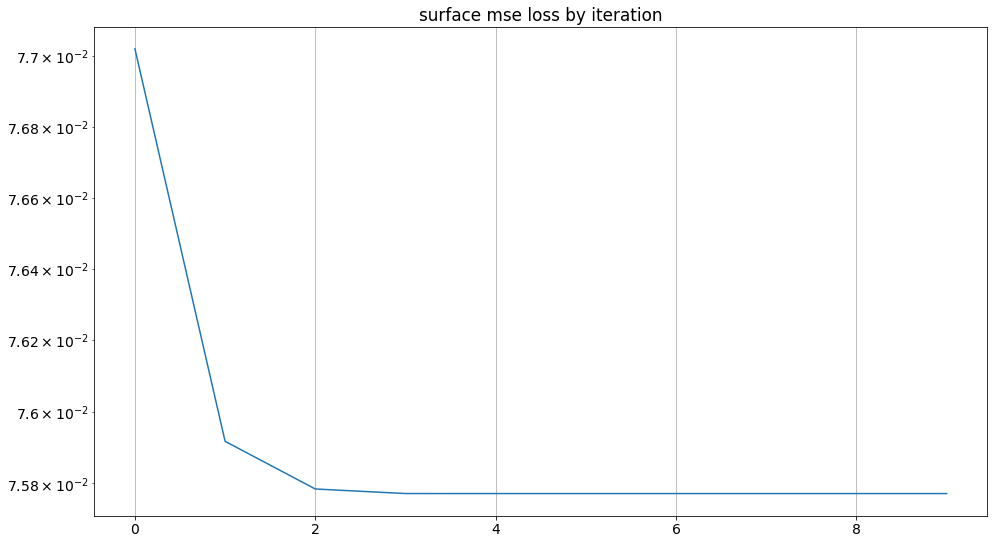

In [27]:
optimal_params, pred_vlt_surf_ms, target_vlt_surf_ms = params_optimizer.optimize(
    target_vlt_surf=vlt_surf_ms.ravel(),
    initial_params=None,
    bounds=bounds,
    scale_vlt_surf=True,
    num_iterations=10,
    real_params=None,
#     OptimCls=optim.Adam, lr=3e-3)
    OptimCls=lbfgs_wrapper.LBFGSScipy)

In [30]:
optimal_params

array([ 0.0225549 ,  0.01000335,  0.01000128,  0.20999911,  0.20999925,
        0.20999848,  0.15239381,  0.01000339,  2.29382885, -0.66955934,
        0.10397748])

In [24]:
optimal_params

array([ 0.00636266,  0.79723377, -1.33976106,  0.75484127,  0.00581449,
        0.95063238,  1.30337076, -1.08636002,  2.40336876, -0.86117747,
        0.1112388 ])

In [31]:
RELOAD()

,eta,rho,H
20130814,2.293829,-0.669559,0.103977


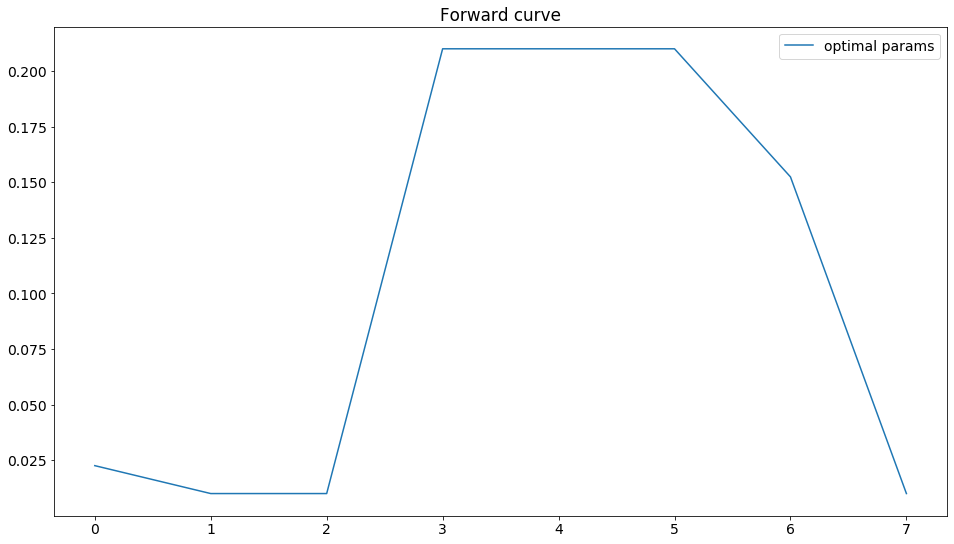

In [32]:
df_params, axis = dplot.plot_params(optimal_params, label=DATE_YYYYMMDD)
df_params

<IPython.core.display.Javascript object>


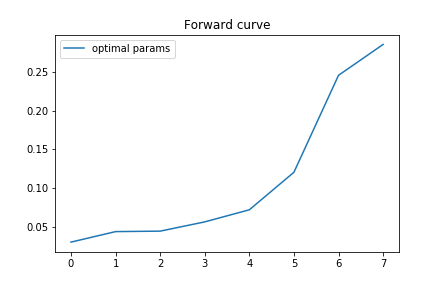

,eta,rho,H
20130814,1.071804,-1.068951,0.38934


In [142]:
df_params, axis = dplot.plot_params(optimal_params, label=DATE_YYYYMMDD)
df_params

In [32]:
%matplotlib notebook

In [38]:
%matplotlib notebook

<IPython.core.display.Javascript object>


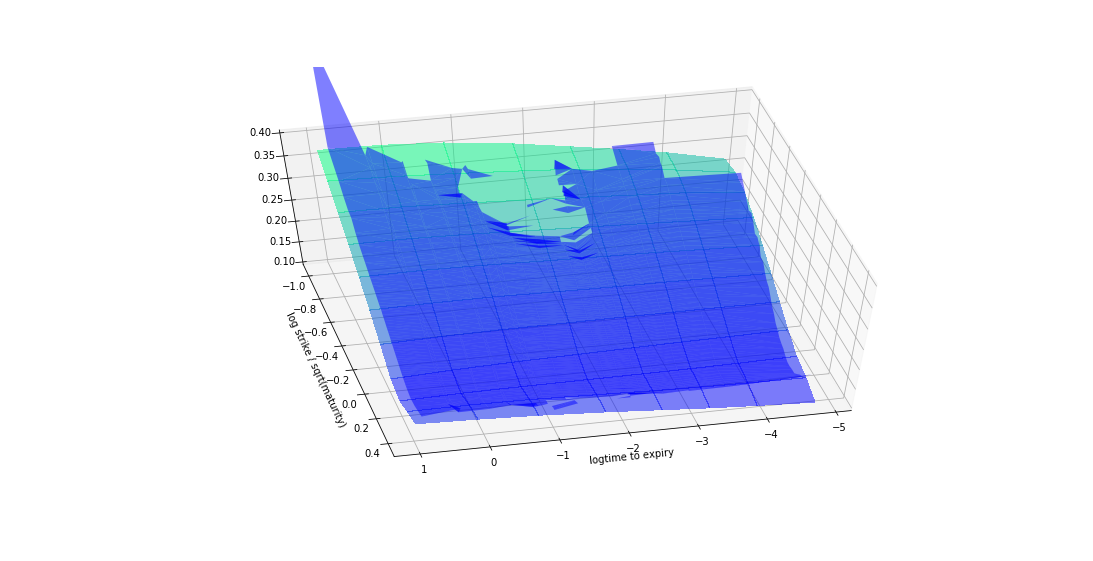

(0.1, 0.4)

In [40]:
import matplotlib.cm as cm
plot_kwargs = {
    "log_mat_tk" : True,
    "log_and_sqrt_strike_tk" : True,
}

# plot_kwargs = {
#     "log_mat_tk" : False,
#     "log_and_sqrt_strike_tk" : False,
# }



fig, axis = dplot.get_fig_axis_3d()

dplot.plot_vol_surface(raw_data["mat_ms"], raw_data["strikes_ms"],
                       pred_vlt_surf_ms, axis=axis, label="1", cmap=cm.winter, **plot_kwargs)

# dplot.plot_vol_surface(raw_data["mat_ms"], raw_data["strikes_ms"],
#                        jims_proposal_for_20130814.values - 0.15, axis=axis, label="1", cmap=cm.Reds, **plot_kwargs)


# dplot.plot_vol_surface(raw_data["mat_ms"], raw_data["strikes_ms"],
#                        target_vlt_surf_ms, axis=axis, label="1", cmap=cm.Reds, **plot_kwargs)


dplot.plot_vol_surface_from_real_data(df_vlt_surf, axis=axis, label="1", cmap=cm.winter, **plot_kwargs)
axis.set_zlim(0.1, 0.4)